In [1]:
import os
os.environ["PATH"] += ":/usr/local/texlive/2024/bin/universal-darwin"

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from helpers import save_dict,load_dict
from plotting_helpers import add_gridlines, add_legends_Sk, add_energy_legends, set_x_ticks


In [2]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)


# Helper Functions

In [4]:
def second_order(x, m1, m2, M_inf_sq):
    return M_inf_sq + m1 * x + m2 * x**2

def third_order(x, m1, m2, m3, M_inf_sq):
    return M_inf_sq + m1 * x + m2 * x**2 + m3 * x**3

# Load Data

In [5]:
Ls_1 = np.arange(6,21,2)
Ls_2 = np.arange(24,33,4)
Ls = np.concatenate((Ls_1,Ls_2),axis=0)
rates = [0.475, 0.25]
scales = [0.25,0.5,1.,2.,4.]

In [6]:
data = load_dict('./final_data/final_correlations_data.pkl')
plotting_data = load_dict('./final_data/final_correlations_data_plotting.pkl')
reference_data = load_dict('./final_data/references.pkl')

# Plot

In [7]:
colorscale = plt.get_cmap('plasma')
shades = np.linspace(0.,0.9,len(scales)+1)[::-1][:-1]
colors = colorscale(shades)
markers = {0.475:'s',0.25:'8'}
markersizes = {0.475:6,0.25:8}
alphas = {0.475:0.5,0.25:1.0}
linestyles= {0.475:'--',0.25:'-'}
bigger_font_size = 22

colorscale_C = plt.get_cmap('viridis')
colors_C = colorscale_C(shades)


### Sk Scaling


Scale = 4.0, Rate=0.25

Second-order Fit
M from <SS>:   0.28213832137531175


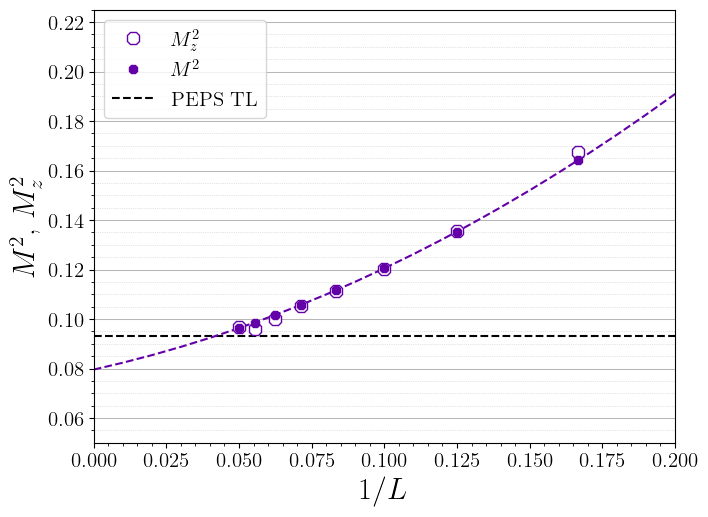

In [8]:
corr_Ls = Ls[:]
scale_i = 4
scale = scales[scale_i]
rate=0.25

p1 = (1.,0)
p2 = (0,1.)

bc='open'
title = bc
data_ = data[bc]
plotting_data_ = plotting_data[bc]
ref_label= reference_data[bc]['method']
ref_x = reference_data[bc]['x']
ref_M_from_Sk = None
ref_M_from_C = None
ref_inf_M = reference_data[bc]['inf M']

show_inset = False

fig, ax = plt.subplots(figsize=square_fig_size)
add_gridlines(axes='y')
if show_inset:
    inset = inset_axes(ax, width="45%", height="30%", loc="upper left", bbox_to_anchor=(0.03,0.,1,1), bbox_transform=ax.transAxes)  # Width and height in % of the parent axes
    mark_inset(ax, inset, fc='none', ec="k", loc1=2, loc2=4, linewidth=0.5, zorder=10)

print(f"\nScale = {scale}, Rate={rate}")

Sk_ls = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk ls']
Sk_x = 1/Sk_ls
Sk_from_SiSj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk from SiSj']/Sk_ls**2
errors_Sk_from_SiSj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err Sk from SiSj']
Sk_from_SziSzj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk from SziSzj']/Sk_ls**2
errors_Sk_from_SziSzj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err Sk from SziSzj']
Sk_from_SxyiSxyj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk from SxyiSxyj']
errors_Sk_from_SxyiSxyj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err Sk from SxyiSxyj']
            
if len(Sk_from_SiSj) > 1:         
    ax.errorbar(Sk_x,Sk_from_SziSzj,marker=markers[rate],fmt='o',ms=10,mfc='white',color=colors[scale_i],alpha=alphas[rate],label=f'$M^2_z$')                
    ax.errorbar(Sk_x,Sk_from_SiSj,marker=markers[rate],fmt='o',color=colors[scale_i],alpha=alphas[rate],label=f'$M^2$')  
                    
    linestyle='--'
    params, covariance = curve_fit(second_order, Sk_x, Sk_from_SiSj)
    x_mesh = np.arange(0,2*max(Sk_x),0.01)
    ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),color=colors[scale_i],alpha=alphas[rate],linestyle=linestyle)
    print(f"\nSecond-order Fit\nM from <SS>:   {np.sqrt(params[-1])}")

    if show_inset:
        inset.errorbar(Sk_x,Sk_from_SziSzj,marker=markers[rate],fmt='o',ms=10,mfc='white',color=colors[scale_i],alpha=alphas[rate])                
        inset.errorbar(Sk_x,Sk_from_SiSj,marker=markers[rate],fmt='o',color=colors[scale_i],alpha=alphas[rate])  

        linestyle='--'
        inset.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),color=colors[scale_i],alpha=alphas[rate],linestyle=linestyle)

        inset.set_xlim(0,0.07)  # Optionally zoom into a region
        inset.set_ylim(0.075, 0.11)  # Optionally zoom into a region
        inset.hlines(ref_inf_M**2,0,2*max(1/ref_x),color='k',linestyle='--',label=f'{ref_label} TL')
        inset.set_xticklabels([],fontsize=10)
        inset.set_yticklabels([],fontsize=10)

if ref_M_from_Sk is not None:
    ax.scatter(1/ref_x,ref_M_from_Sk/ref_x**2,c='k',marker='*',s=75,label=f'{ref_label}')
    ax.scatter(1/ref_x,ref_M_from_C/ref_x**2,c='k',marker='*',s=75)

ax.hlines(ref_inf_M**2,0,2*max(1/ref_x),color='k',linestyle='--',label=f'{ref_label} TL')

ax.set_xlabel(r'$1/L$', fontsize=bigger_font_size)
ax.set_ylabel(r'$M^2$, $M^2_z$', fontsize=bigger_font_size)
ax.set_ylim(0.05,0.225)
ax.set_xlim(0,.2)
handles, labels = ax.get_legend_handles_labels()
order = np.roll(np.arange(len(handles)),shift=2)
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='best',ncol=1)

plt.savefig('./final_figures/M_scaling_open.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

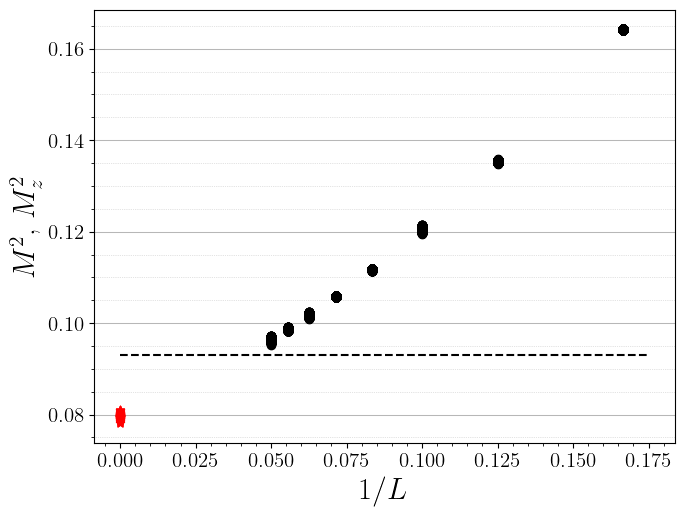

--------------------------------------------------
Getting y-int
--------------------------------------------------
y-int before:     0.07960203238847871
y-int BOOTSTRAP:  0.0795999709448404
err(y-int) BOOTSTRAP:  5.165599979732878e-06


In [9]:
np.random.seed(100)
Nb = 10000

bc = 'open'
scale = 4.0
rate = 0.25
Sk_ls = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk ls']
Sk_from_SiSj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk from SiSj']/Sk_ls**2
errors_Sk_from_SiSj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err Sk from SiSj']

fig, ax = plt.subplots(figsize=square_fig_size)
add_gridlines(axes='y')

# Reproduce above fit 
Sk_x = 1/Sk_ls
params, covariance = curve_fit(second_order, Sk_x, Sk_from_SiSj)

# Get residuals
xs = np.reshape(np.tile(1/Sk_ls, Nb),(Nb,-1))
predicted_ys = second_order(Sk_x,params[0],params[1],params[2])
residuals = Sk_from_SiSj - predicted_ys

# Get resampled y values
gaussian_vars = np.random.normal(loc=0.0,scale=1.0,size=(Nb,len(predicted_ys)))
resampled_ys = predicted_ys + residuals * gaussian_vars
ax.scatter(xs, resampled_ys, color='k')

# Perform fits through resampled data
intercepts = []
for b in range(Nb):
    x = xs[b, :]
    y = resampled_ys[b, :]
    paramsb, _ = curve_fit(second_order, x, y)
    intercepts.append(paramsb[-1])
    if b % 100 == 0:
        ax.scatter(0,paramsb[-1],marker='*',color='red')

intercepts = np.array(intercepts)

ax.hlines(ref_inf_M**2,0,1.05*max(x),linestyle='--',color='k',label=ref_label+' TL')
ax.set_ylabel(r'$M^2$, $M^2_z$',fontsize=bigger_font_size)
ax.set_xlabel(f'$1/L$',fontsize=bigger_font_size)
plt.show()

print("-" * 50)
print("Getting y-int")
print("-" * 50)
print("y-int before:    ", params[-1])
print("y-int BOOTSTRAP: ", np.mean(intercepts))
# print("err(y-int) before:    ", err)
print("err(y-int) BOOTSTRAP: ", np.std(intercepts)/np.sqrt(Nb))




## Periodic


Scale = 0.25, Rate = 0.475

Linear Fit
M from <SS>:   0.3069906776970815

Second-order Fit
M from <SS>:   0.32567243202954177
------C(L/2,L/2)------

Linear Fit
M from <SS>:   0.32280414428271786

Second-order Fit
M from <SS>:   0.332511071612151

Scale = 0.25, Rate = 0.25

Linear Fit
M from <SS>:   0.30365527392942815

Second-order Fit
M from <SS>:   0.31730438346858764
------C(L/2,L/2)------

Linear Fit
M from <SS>:   0.3176039782804277

Second-order Fit
M from <SS>:   0.3240383780693084


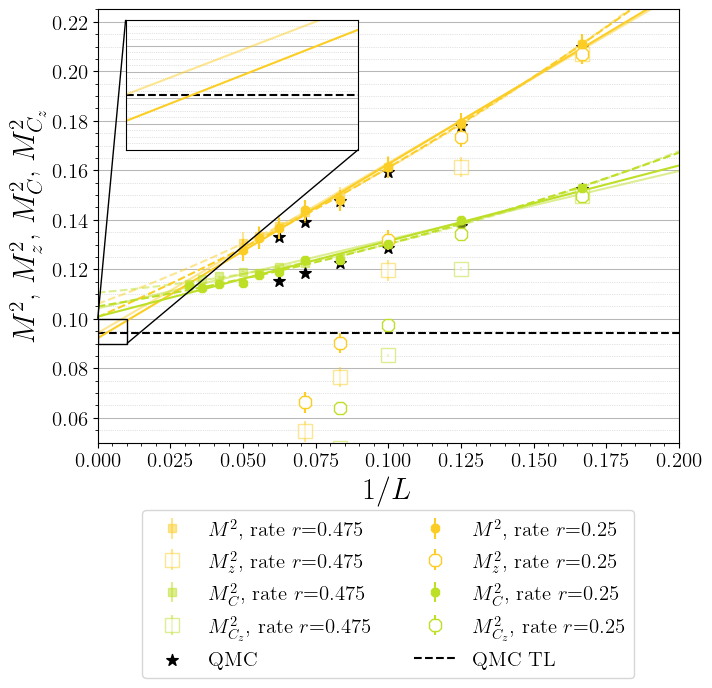


Scale = 0.5, Rate = 0.475

Linear Fit
M from <SS>:   0.30353181798491446

Second-order Fit
M from <SS>:   0.3222961772651582
------C(L/2,L/2)------

Linear Fit
M from <SS>:   0.32018870905245345

Second-order Fit
M from <SS>:   0.3314962961701856

Scale = 0.5, Rate = 0.25

Linear Fit
M from <SS>:   0.29925130531978933

Second-order Fit
M from <SS>:   0.313982830271406
------C(L/2,L/2)------

Linear Fit
M from <SS>:   0.31458977785792885

Second-order Fit
M from <SS>:   0.32363448493958635


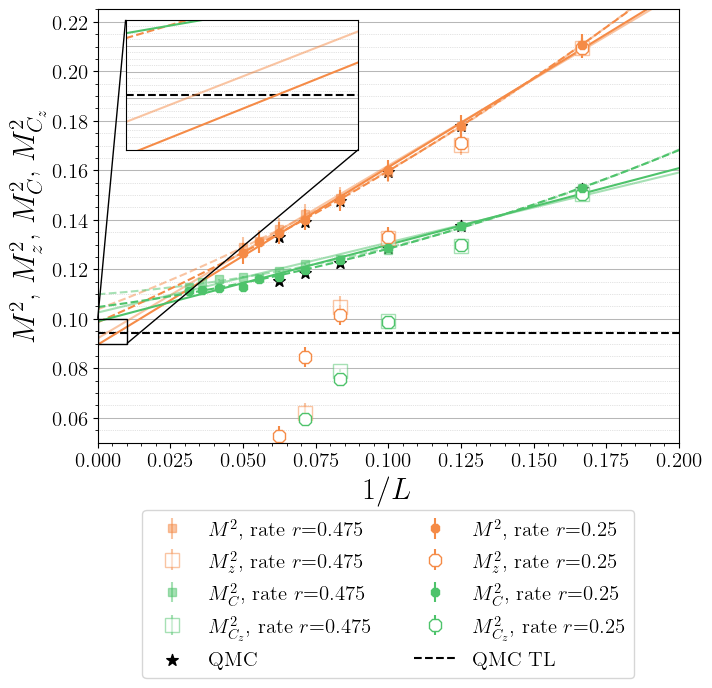


Scale = 1.0, Rate = 0.475

Linear Fit
M from <SS>:   0.30058108973188535

Second-order Fit
M from <SS>:   0.31527691983076
------C(L/2,L/2)------

Linear Fit
M from <SS>:   0.314695838143666

Second-order Fit
M from <SS>:   0.32243748935243427

Scale = 1.0, Rate = 0.25

Linear Fit
M from <SS>:   0.2991644783463812

Second-order Fit
M from <SS>:   0.3130223364213754
------C(L/2,L/2)------

Linear Fit
M from <SS>:   0.31226486896889816

Second-order Fit
M from <SS>:   0.31922974558731515


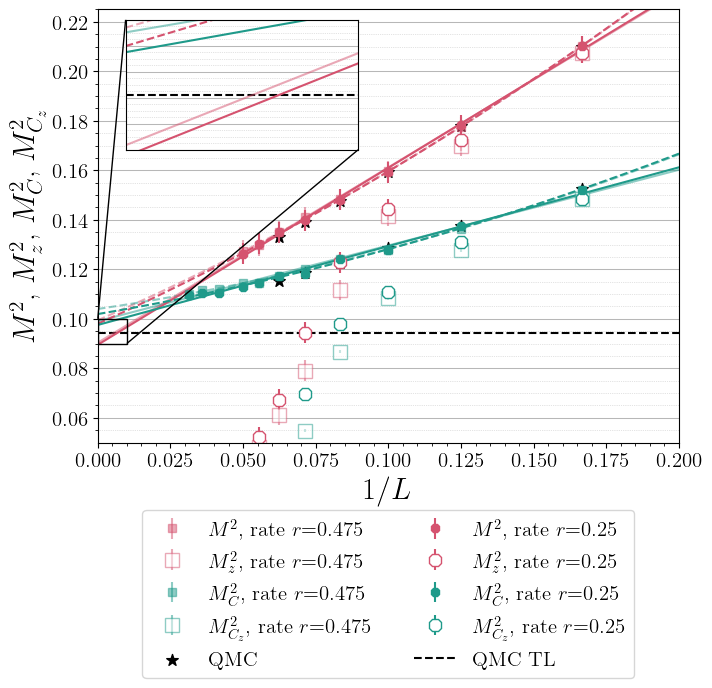


Scale = 2.0, Rate = 0.475

Linear Fit
M from <SS>:   0.30038105163429596

Second-order Fit
M from <SS>:   0.3154781354808751
------C(L/2,L/2)------

Linear Fit
M from <SS>:   0.3127948026866665

Second-order Fit
M from <SS>:   0.31885283626242694

Scale = 2.0, Rate = 0.25

Linear Fit
M from <SS>:   0.2982591394643838

Second-order Fit
M from <SS>:   0.31282497179999397
------C(L/2,L/2)------

Linear Fit
M from <SS>:   0.31066791827308743

Second-order Fit
M from <SS>:   0.31634511143291044


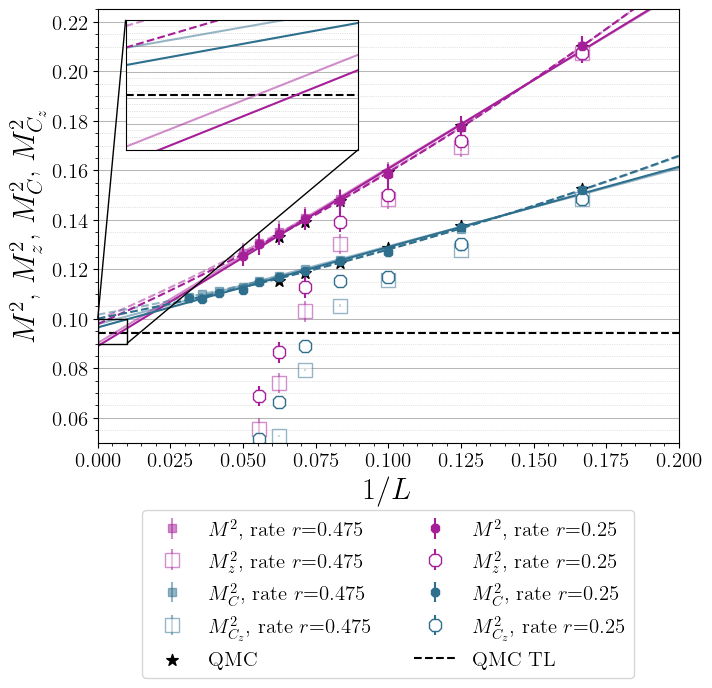


Scale = 4.0, Rate = 0.475

Linear Fit
M from <SS>:   0.2959737040268493

Second-order Fit
M from <SS>:   0.3070738712664153
------C(L/2,L/2)------

Linear Fit
M from <SS>:   0.30946662842991113

Second-order Fit
M from <SS>:   0.3156029958951997

Scale = 4.0, Rate = 0.25

Linear Fit
M from <SS>:   0.2969014708978092

Second-order Fit
M from <SS>:   0.30894033055397657
------C(L/2,L/2)------

Linear Fit
M from <SS>:   0.30834964553120264

Second-order Fit
M from <SS>:   0.3115372191038213


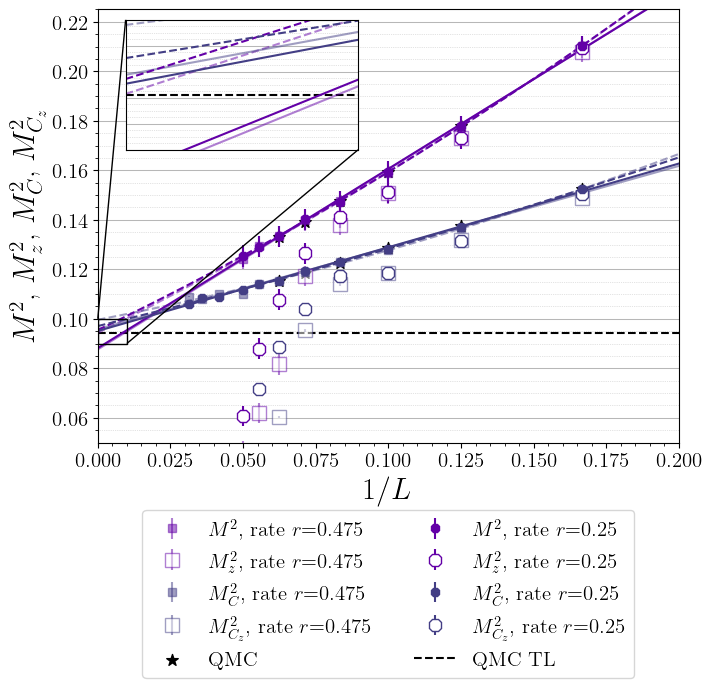

In [10]:
corr_Ls = Ls[:]

p1 = (1.,0)
p2 = (0,1.)

bc='periodic'
title = bc
data_ = data[bc]
plotting_data_ = plotting_data[bc]
ref_label= reference_data[bc]['method']
ref_x = reference_data[bc]['x']
ref_M_from_Sk = reference_data[bc]['M^2 from Sk']
ref_M_from_C = reference_data[bc]['M^2 from C']
ref_inf_M = reference_data[bc]['inf M']

show_C = True

diffs = {}

for scale_i,scale in enumerate(scales):
    diffs[f"scale={scale}"] = {}

    fig, ax = plt.subplots(figsize=square_fig_size)
    add_gridlines(axes='y')
    inset = inset_axes(ax, width="40%", height="30%", loc="upper left", bbox_to_anchor=(0.03,0.,1,1), bbox_transform=ax.transAxes)  # Width and height in % of the parent axes
    mark_inset(ax, inset, fc='none', ec="k", loc1=2, loc2=4, linewidth=1, zorder=10)

    if ref_M_from_Sk is not None:
        ax.scatter(1/ref_x,ref_M_from_Sk/ref_x**2,c='k',marker='*',s=75,label=f'{ref_label}')
        ax.scatter(1/ref_x,ref_M_from_C,c='k',marker='*',s=75)

    ax.hlines(ref_inf_M**2,0,2*max(1/ref_x),color='k',linestyle='--',label=f'{ref_label} TL')

    for rate in rates:
        print(f"\nScale = {scale}, Rate = {rate}")

        Sk_ls = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk ls']
        Sk_x = 1/Sk_ls
        Sk_from_SiSj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk from SiSj']/Sk_ls**2
        errors_Sk_from_SiSj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err Sk from SiSj']
        Sk_from_SziSzj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk from SziSzj']/Sk_ls**2
        errors_Sk_from_SziSzj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err Sk from SziSzj']
        Sk_from_SxyiSxyj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk from SxyiSxyj']
        errors_Sk_from_SxyiSxyj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err Sk from SxyiSxyj']

        C_ls = plotting_data_[f"rate={rate}"][f"scale={scale}"]['C ls']
        C_x = 1/C_ls
        C = plotting_data_[f"rate={rate}"][f"scale={scale}"]['C(L/2,L/2)']
        errors_C = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err C(L/2,L/2)']
        Cz = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Cz(L/2,L/2)']
        errors_Cz = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err Cz(L/2,L/2)']
        Cxy = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Cxy(L/2,L/2)']
        errors_Cxy = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err Cxy(L/2,L/2)']

        ## gather diffs to visualize symmetry breaking
        diffs[f"scale={scale}"][f"rate={rate}"] = {}
        if 'Sk from SiSj' in plotting_data_[f"rate={rate}"][f"scale={scale}"].keys():
            diffs[f"scale={scale}"][f"rate={rate}"]['Sk Ls'] = Sk_ls
            diffs[f"scale={scale}"][f"rate={rate}"]['Sk - Skz'] = abs(Sk_from_SiSj - Sk_from_SziSzj)
            diffs[f"scale={scale}"][f"rate={rate}"]['Sk - Skxy'] = abs(Sk_from_SiSj - Sk_from_SxyiSxyj)
        if 'C(L/2,L/2)' in plotting_data_[f"rate={rate}"][f"scale={scale}"].keys():
            diffs[f"scale={scale}"][f"rate={rate}"]['C Ls'] = C_ls
            diffs[f"scale={scale}"][f"rate={rate}"]['C - Cz'] = abs(C - Cz)
            diffs[f"scale={scale}"][f"rate={rate}"]['C - Cxy'] = abs(C - Cxy)

        if len(Sk_from_SiSj) > 1:         
            ax.errorbar(Sk_x,Sk_from_SziSzj,yerr=errors_Sk_from_SziSzj,capsize=0,marker=markers[rate],fmt='o',ms=10,mfc='white',color=colors[scale_i],alpha=alphas[rate],label=f'$M^2_z$, rate $r$={rate}')                
            ax.errorbar(Sk_x,Sk_from_SiSj,yerr=errors_Sk_from_SiSj,capsize=0,marker=markers[rate],fmt='o',color=colors[scale_i],alpha=alphas[rate],label=f'$M^2$, rate $r$={rate}')  
            
            linestyle='-'
            regression_x = np.array(Sk_x)[:,np.newaxis]
            reg_Sk = LinearRegression().fit(regression_x, np.real(Sk_from_SiSj))     
            x_mesh = np.arange(0,2*max(Sk_x),0.01)
            ax.plot(x_mesh,reg_Sk.coef_*x_mesh+reg_Sk.intercept_,color=colors[scale_i],alpha=alphas[rate],linestyle=linestyle)
            inset.plot(x_mesh,reg_Sk.coef_*x_mesh+reg_Sk.intercept_,color=colors[scale_i],alpha=alphas[rate],linestyle=linestyle)
            print(f"\nLinear Fit\nM from <SS>:   {np.sqrt(reg_Sk.intercept_)}")

            linestyle='--'
            params_Sk, covariance = curve_fit(second_order, Sk_x, Sk_from_SiSj)
            x_mesh = np.arange(0,2*max(Sk_x),0.01)
            ax.plot(x_mesh,second_order(x_mesh,params_Sk[0],params_Sk[1],params_Sk[2]),color=colors[scale_i],alpha=alphas[rate],linestyle=linestyle)
            inset.plot(x_mesh,second_order(x_mesh,params_Sk[0],params_Sk[1],params_Sk[2]),color=colors[scale_i],alpha=alphas[rate],linestyle=linestyle)
            print(f"\nSecond-order Fit\nM from <SS>:   {np.sqrt(params_Sk[-1])}")

            # linestyle=':'
            # params_3_Sk, _ = curve_fit(third_order, Sk_x, Sk_from_SiSj)
            # x_mesh = np.arange(0,2*max(Sk_x),0.01)
            # ax.plot(x_mesh,third_order(x_mesh,params_3_Sk[0],params_3_Sk[1],params_3_Sk[2],params_3_Sk[3]),color=colors[scale_i],alpha=alphas[rate],linestyle=linestyle)
            # print(f"\nThird-order Fit\nM from <SS>:   {np.sqrt(params_3_Sk[-1])}")

            if show_C:
                print("------C(L/2,L/2)------")
                ax.errorbar(C_x,Cz,yerr=errors_Cz,capsize=0,marker=markers[rate],fmt='o',ms=10,mfc='white',color=colors_C[scale_i],alpha=alphas[rate],label=r'$M^2_{C_z}$, '+f'rate $r$={rate}')                
                ax.errorbar(C_x,C,yerr=errors_C,capsize=0,marker=markers[rate],fmt='o',color=colors_C[scale_i],alpha=alphas[rate],label=r'$M^2_{C}$, '+f'rate $r$={rate}')  
                
                linestyle='-'
                regression_x = np.array(C_x)[:,np.newaxis]
                reg_C = LinearRegression().fit(regression_x, C)     
                x_mesh = np.arange(0,2*max(C_x),0.01)
                ax.plot(x_mesh,reg_C.coef_*x_mesh+reg_C.intercept_,color=colors_C[scale_i],alpha=alphas[rate],linestyle=linestyle)
                inset.plot(x_mesh,reg_C.coef_*x_mesh+reg_C.intercept_,color=colors_C[scale_i],alpha=alphas[rate],linestyle=linestyle)
                print(f"\nLinear Fit\nM from <SS>:   {np.sqrt(reg_C.intercept_)}")

                linestyle='--'
                params_C, covariance = curve_fit(second_order, C_x, C)
                x_mesh = np.arange(0,2*max(C_x),0.01)
                ax.plot(x_mesh,second_order(x_mesh,params_C[0],params_C[1],params_C[2]),color=colors_C[scale_i],alpha=alphas[rate],linestyle=linestyle)
                inset.plot(x_mesh,second_order(x_mesh,params_C[0],params_C[1],params_C[2]),color=colors_C[scale_i],alpha=alphas[rate],linestyle=linestyle)
                print(f"\nSecond-order Fit\nM from <SS>:   {np.sqrt(params_C[-1])}")

                # linestyle=':'
                # params3_C, covariance = curve_fit(third_order, C_x, C)
                # x_mesh = np.arange(0,2*max(C_x),0.01)
                # ax.plot(x_mesh,third_order(x_mesh,params3_C[0],params3_C[1],params3_C[2],params3_C[3]),color=colors_C[scale_i],alpha=alphas[rate],linestyle=linestyle)
                # print(f"\nThird-order Fit\nM from <SS>:   {np.sqrt(params3_C[-1])}")

    inset.set_xlim(0,0.01)
    inset.set_ylim(0.09, 0.10)
    inset.hlines(ref_inf_M**2,0,2*max(1/ref_x),color='k',linestyle='--',label=f'{ref_label} TL')
    add_gridlines(axes='y')
    inset.set_xticklabels([],fontsize=10)
    inset.set_yticklabels([],fontsize=10)
    inset.tick_params(axis='both', which='both', length=0, labelsize=0)

    ax.set_xlabel(r'$1/L$', fontsize=bigger_font_size)
    ax.set_ylabel(r'$M^2$, $M^2_z$, $M^2_C$, $M^2_{C_z}$', fontsize=bigger_font_size)
    ax.set_ylim(0.05,0.225)
    ax.set_xlim(0,.2)
    handles, labels = ax.get_legend_handles_labels()
    order = [ 3,2, 5,4, 0, 7,6, 9,8, 1]
    if len(order)==len(handles):
        ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='center',bbox_to_anchor=(0.5,-0.35),ncol=2)
    else:
        ax.legend(loc='center',bbox_to_anchor=(0.5,-0.35),ncol=2)

    if scale==4.0:
        plt.savefig('./final_figures/M_scaling_peri.pdf',bbox_inches='tight',pad_inches=0.1)
    plt.show()

## Bootstrapping $M^2$

6 -----------
7.572394321902889
0.004112522212199484
8 -----------
11.375464027998335
0.004183444650225415
10 -----------
15.933872279406842
0.004219868779755212
12 -----------
21.20780711027099
0.004237022471266234
14 -----------
27.47313326507859
0.004255627802269276
16 -----------
34.147097987818015
0.004274661374681231
18 -----------
41.85551799780624
0.004291175238513577
20 -----------
50.16571964024577
0.004307716052378366


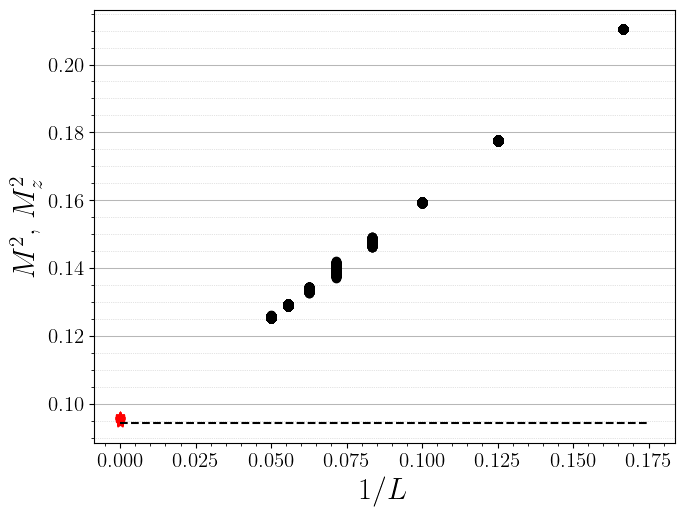

--------------------------------------------------
Getting y-int
--------------------------------------------------
y-int before:        0.0954441278428003
M_\infty before:     0.30894033055397657
y-int BOOTSTRAP:     0.09543788964954845  +/- 3.5544117272634273e-06
M_\infty BOOTSTRAP:  0.30893023427555366  +/- 0.0018853147554887028


In [11]:
np.random.seed(100)
Nb = 10000

scale=4.0
rate=0.25

Sk_ls = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk ls']
Sk_x = 1/Sk_ls

# Print finite-size values of Sk
Sk_from_SiSj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['Sk from SiSj']/Sk_ls**2
errors_Sk_from_SiSj = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err Sk from SiSj']
for l_i,l in enumerate(Sk_ls):
    print(l,"-----------")
    print(Sk_from_SiSj[l_i] * l**2)
    print(errors_Sk_from_SiSj[l_i])

fig, ax = plt.subplots(figsize=square_fig_size)
add_gridlines(axes='y')

# Get residuals
xs = np.reshape(np.tile(Sk_x, Nb),(Nb,-1))
predicted_ys = second_order(Sk_x,params_Sk[0],params_Sk[1],params_Sk[2])
residuals = Sk_from_SiSj - predicted_ys

# Get resampled y values
gaussian_vars = np.random.normal(loc=0.0,scale=1.0,size=(Nb,len(predicted_ys)))
resampled_ys = predicted_ys + residuals * gaussian_vars
ax.scatter(xs, resampled_ys, color='k')

# Perform fits through resampled data
intercepts = []
for b in range(Nb):
    x = xs[b, :]
    y = resampled_ys[b, :]
    paramsb, _ = curve_fit(second_order, x, y)
    intercepts.append(paramsb[-1])
    if b % 100 == 0:
        ax.scatter(0,paramsb[-1],marker='*',color='red')

intercepts = np.array(intercepts)

ax.hlines(ref_inf_M**2,0,1.05*max(x),linestyle='--',color='k',label=ref_label+' TDL')
ax.set_ylabel(r'$M^2$, $M^2_z$',fontsize=bigger_font_size)
ax.set_xlabel(f'$1/L$',fontsize=bigger_font_size)
plt.show()

print("-" * 50)
print("Getting y-int")
print("-" * 50)
print("y-int before:       ", params_Sk[-1])
print("M_\infty before:    ", np.sqrt(params_Sk[-1]))
print("y-int BOOTSTRAP:    ", np.mean(intercepts)," +/-", np.std(intercepts)/np.sqrt(Nb))
print("M_\infty BOOTSTRAP: ", np.sqrt(np.mean(intercepts))," +/-", np.sqrt(np.std(intercepts)/np.sqrt(Nb)))




## Bootstrapping $M^2_C$

6 -----------
0.15233054296630952
0.0009068500398498222
8 -----------
0.13696931351791136
0.0006832350483574642
10 -----------
0.12828446076605468
0.0005692220690749806
12 -----------
0.12300668569333438
0.0004728706704377447
14 -----------
0.11931174603490423
0.00040930703283018294
16 -----------
0.11540831862796039
0.0003616190492140983
18 -----------
0.11393671843085298
0.00031996093705443333
20 -----------
0.11167473741569556
0.0002955948598242295
24 -----------
0.10893187126180338
0.00024545215918204093
28 -----------
0.10847253803560529
0.00021070663435315113
32 -----------
0.10600096226209507
0.00018444098060585345


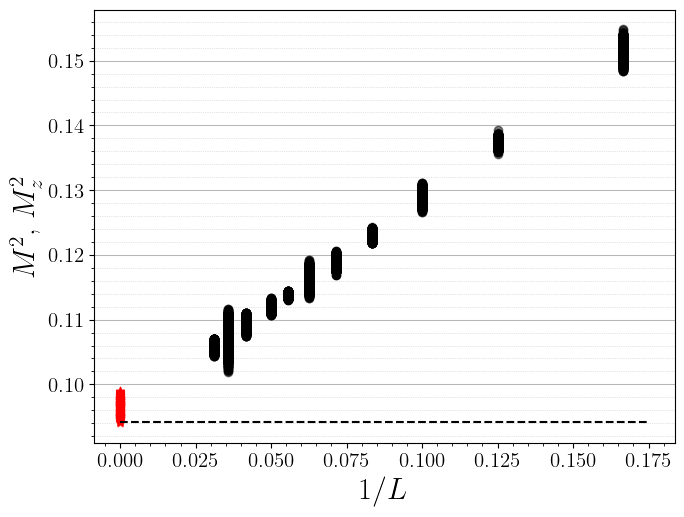

--------------------------------------------------
Getting y-int
--------------------------------------------------
--- second order ---
y-int before (second order):           0.09705543888694237
$M_\infty$ before (second order):      0.3115372191038213
y-int BOOTSTRAP (second order):        0.09706003451719204  +/-  6.6486538267547965e-06
$M_\infty$ BOOTSTRAP:                  0.3115445947487968  +/-  0.002578498366637993
--- linear ---
y-int before (linear):        0.09507950389921833
$M_\infty$ before (linear):   0.30834964553120264
y-int BOOTSTRAP (linear):     0.09508470824514115  +/-  4.686881723676912e-06
$M_\infty$ BOOTSTRAP:         0.3083580844491371  +/-  0.0021649207199518675


In [12]:
np.random.seed(100)
Nb = 10000

C_ls = plotting_data_[f"rate={rate}"][f"scale={scale}"]['C ls']
C_x = 1/C_ls

# Print finite-size values of C
C = plotting_data_[f"rate={rate}"][f"scale={scale}"]['C(L/2,L/2)']
errors_C = plotting_data_[f"rate={rate}"][f"scale={scale}"]['err C(L/2,L/2)']
for l_i,l in enumerate(C_ls):
    print(l,"-----------")
    print(C[l_i])
    print(errors_C[l_i])

fig, ax = plt.subplots(figsize=square_fig_size)
add_gridlines(axes='y')

# Get residuals
xs = np.reshape(np.tile(C_x, Nb),(Nb,-1))
predicted_ys_second_order = second_order(C_x,params_C[0],params_C[1],params_C[2])
predicted_ys_linear = reg_C.coef_*C_x + reg_C.intercept_
residuals_second_order = C - predicted_ys_second_order
residuals_linear = C - predicted_ys_linear

# Get resampled y values
gaussian_vars = np.random.normal(loc=0.0,scale=1.0,size=np.shape(xs))
resampled_ys_second_order = predicted_ys_second_order + residuals_second_order * gaussian_vars
resampled_ys_linear = predicted_ys_linear + residuals_linear * gaussian_vars
ax.scatter(xs, resampled_ys_second_order, color='k')
ax.scatter(xs, resampled_ys_linear, color='k',alpha=0.5)

# Perform fits through resampled data
intercepts_second_order = []
intercepts_linear = []
for b in range(Nb):
    x = xs[b, :]
    y_second_order = resampled_ys_second_order[b, :]
    paramsb, _ = curve_fit(second_order, x, y_second_order)
    intercepts_second_order.append(paramsb[-1])
    x = x[:,np.newaxis]
    y_linear = resampled_ys_linear[b,:]
    regb = LinearRegression().fit(x,y_linear)
    intercepts_linear.append(regb.intercept_)
    if b % 100 == 0:
        ax.scatter(0,paramsb[-1],marker='*',color='red')
        ax.scatter(0,regb.intercept_,marker='*',color='red',alpha=0.5)

intercepts_second_order = np.array(intercepts_second_order)
intercepts_linear = np.array(intercepts_linear)

ax.hlines(ref_inf_M**2,0,1.05*max(x),linestyle='--',color='k',label=ref_label+' TDL')
# ax.set_ylim(-0.681, -0.666)  # Optionally zoom into a region
ax.set_ylabel(r'$M^2$, $M^2_z$',fontsize=bigger_font_size)
ax.set_xlabel(f'$1/L$',fontsize=bigger_font_size)
plt.show()

print("-" * 50)
print("Getting y-int")
print("-" * 50)
print("--- second order ---")
print("y-int before (second order):          ", params_C[-1])
print(r"$M_\infty$ before (second order):     ", np.sqrt(params_C[-1]))
print("y-int BOOTSTRAP (second order):       ", np.mean(intercepts_second_order), " +/- ", np.std(intercepts_second_order)/np.sqrt(Nb))
print(r"$M_\infty$ BOOTSTRAP:                 ", np.sqrt(np.mean(intercepts_second_order)), " +/- ", np.sqrt(np.std(intercepts_second_order)/np.sqrt(Nb)))
print("--- linear ---")
print("y-int before (linear):       ", reg_C.intercept_)
print(r"$M_\infty$ before (linear):  ", np.sqrt(reg_C.intercept_))
print("y-int BOOTSTRAP (linear):    ", np.mean(intercepts_linear), " +/- ", np.std(intercepts_linear)/np.sqrt(Nb))
print(r"$M_\infty$ BOOTSTRAP:        ", np.sqrt(np.mean(intercepts_linear)), " +/- ", np.sqrt(np.std(intercepts_linear)/np.sqrt(Nb)))


# Look at symmetry breaking

In [13]:
save_dict(diffs,'./final_data/symmetry_breaking_data.pkl')

In [14]:
energy_data = load_dict('./final_data/final_energy_data_plotting.pkl')
reference_data = load_dict('./final_data/references.pkl')

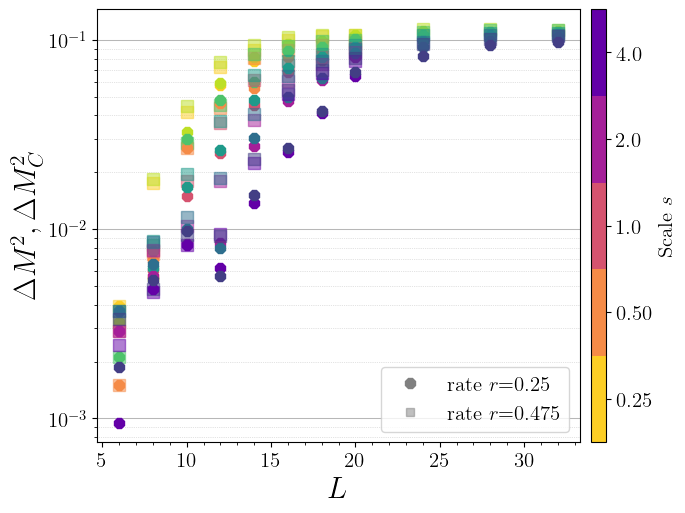

In [15]:
plt.figure(figsize=square_fig_size)

for scale_i,scale in enumerate(scales):
    for rate in rates:
        if 'Sk - Skz' in diffs[f"scale={scale}"][f"rate={rate}"].keys():
            sk_ls = diffs[f"scale={scale}"][f"rate={rate}"]['Sk Ls']
            plt.errorbar(sk_ls, diffs[f"scale={scale}"][f"rate={rate}"]['Sk - Skz'], markersize=8,marker=markers[rate],fmt='o',color=colors[scale_i],alpha=alphas[rate],label=r'$\Delta M^2$, '+f'rate={rate}')
            # plt.errorbar(sk_ls, diffs[f"scale={scale}"][f"rate={rate}"]['Sk - Skxy'], markersize=8,marker=markers[rate],fmt='o',color=colors[scale_i],alpha=alphas[rate]/5,label=r'$\Delta M^2$, '+f'rate={rate}')
        if 'C - Cz' in diffs[f"scale={scale}"][f"rate={rate}"].keys():
            c_ls = diffs[f"scale={scale}"][f"rate={rate}"]['C Ls']
            plt.errorbar(c_ls, diffs[f"scale={scale}"][f"rate={rate}"]['C - Cz'], markersize=8,marker=markers[rate],fmt='o',color=colors_C[scale_i],alpha=alphas[rate],label=r'$\Delta M^2_{C}$, '+f'rate={rate}')
            # plt.errorbar(c_ls, diffs[f"scale={scale}"][f"rate={rate}"]['C - Cxy'], markersize=8,marker=markers[rate],fmt='o',color=colors_C[scale_i],alpha=alphas[rate]/5,label=r'$\Delta M^2_{C}$, '+f'rate={rate}')

add_gridlines(axes='y')
add_energy_legends(show_runs=True)

plt.ylabel('$\Delta M^2, \Delta M^2_{C}$',fontsize=bigger_font_size)
plt.xlabel('$L$',fontsize=bigger_font_size)
plt.yscale('log')
plt.show()

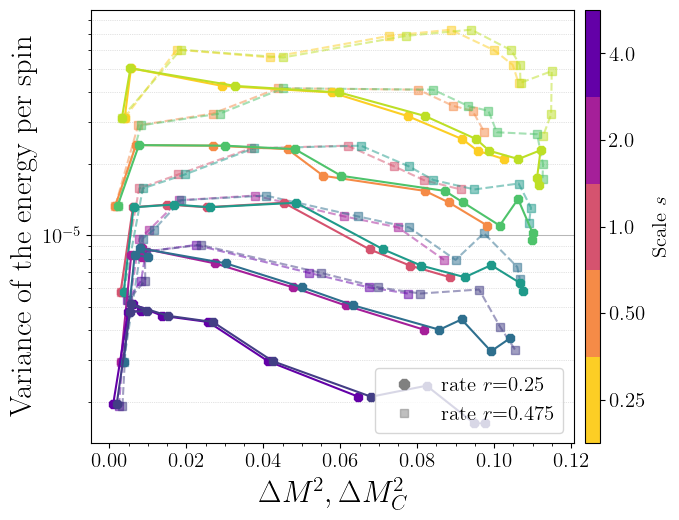

In [16]:

fig, ax = plt.subplots(figsize=square_fig_size)

bc = 'periodic'
data_ = energy_data[bc]
ref_data_ = reference_data[bc]
scaling_power = ref_data_['scaling power']
ref_label = ref_data_['method']
ref_inf_energy = ref_data_['inf E']
reference_x = ref_data_['x']
reference_ens = ref_data_['energy']

for rate_i, rate in enumerate(rates):
    for scale_i, scale in enumerate(scales):
        vars_ = []
        delta_Cz = []
        delta_Skz = []
        delta_Cxy = []
        delta_Skxy = []
        if ('variances' in data_[f"rate={rate}"][f"scale={scale}"].keys()) & ('Sk - Skz' in diffs[f"scale={scale}"][f"rate={rate}"].keys()):
            var = data_[f"rate={rate}"][f"scale={scale}"]['variances']
            diff_Skz = diffs[f"scale={scale}"][f"rate={rate}"]['Sk - Skz']
            diff_Skxy = diffs[f"scale={scale}"][f"rate={rate}"]['Sk - Skxy']
            plt.errorbar(diff_Skz,var[:len(diff_Skz)],
                        color=colors[scale_i],
                        linestyle=linestyles[rate],marker=markers[rate],alpha=alphas[rate],
                        label=f'rate={rate}')
            # plt.errorbar(diff_Skxy,var[:len(diff_Skxy)],
            #             color=colors[scale_i],
            #             linestyle=linestyles[rate],marker=markers[rate],alpha=alphas[rate]/5,
            #             label=f'rate={rate}')
            
        if ('variances' in data_[f"rate={rate}"][f"scale={scale}"].keys()) & ('C - Cz' in diffs[f"scale={scale}"][f"rate={rate}"].keys()):
            var = data_[f"rate={rate}"][f"scale={scale}"]['variances']
            diff_Cz = diffs[f"scale={scale}"][f"rate={rate}"]['C - Cz']
            diff_Cxy = diffs[f"scale={scale}"][f"rate={rate}"]['C - Cxy']
            plt.errorbar(diff_Cz,var[:len(diff_Cz)],
                        color=colors_C[scale_i],
                        linestyle=linestyles[rate],marker=markers[rate],alpha=alphas[rate],
                        label=f'rate={rate}')
            # plt.errorbar(diff_Cxy,var[:len(diff_Cxy)],
            #             color=colors_C[scale_i],
            #             linestyle=linestyles[rate],marker=markers[rate],alpha=alphas[rate]/5,
            #             label=f'rate={rate}')

add_gridlines(axes='y')
add_energy_legends(show_runs=True)

plt.ylabel("Variance of the energy per spin",fontsize=bigger_font_size)
plt.xlabel('$\Delta M^2, \Delta M^2_{C}$',fontsize=bigger_font_size)
plt.yscale('log')
plt.show()